# Simple Linear Regression


In [81]:
import tensorflow as tf
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error


# Data set:
[Deleted User]. (2016). Boston Housing. Kaggle. https://kaggle.com/competitions/boston-housing


In [82]:
test = pd.read_csv("/home/mthobisi/Downloads/test.csv")

train = pd.read_csv("/home/mthobisi/Downloads/train.csv")

sub = pd.read_csv("/home/mthobisi/Downloads/submission_example.csv")

test.head()


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [83]:
train.columns = ["ID",	"crim",	"zn",	"indus",	"chas"	,"nox"	,"rm"	,"age"	,"dis"	,"rad"	,"tax"	,"ptratio",	"black"	,"lstat", "medv"]

train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


<Axes: >

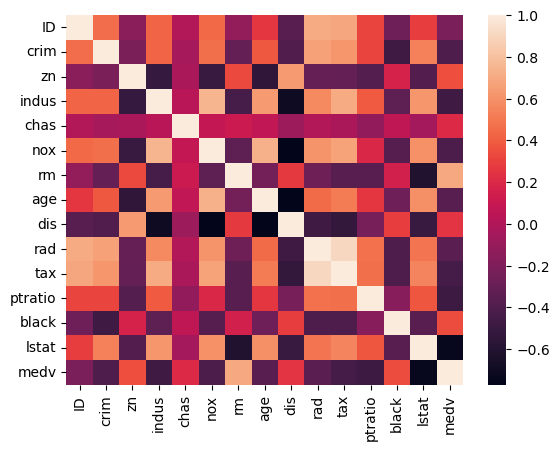

In [84]:
sns.heatmap(train.corr())

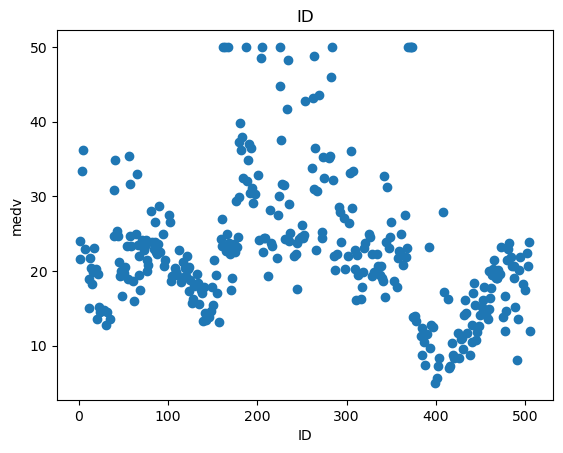

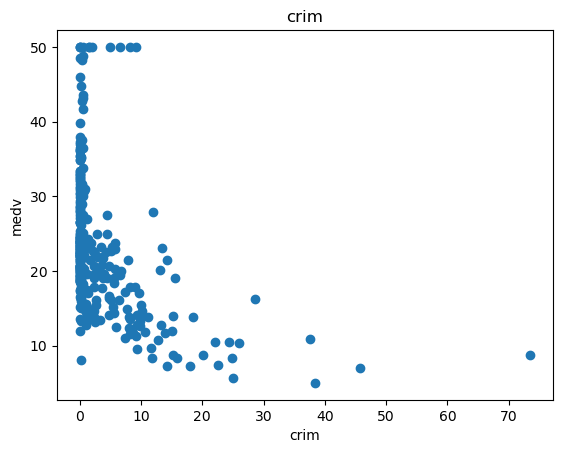

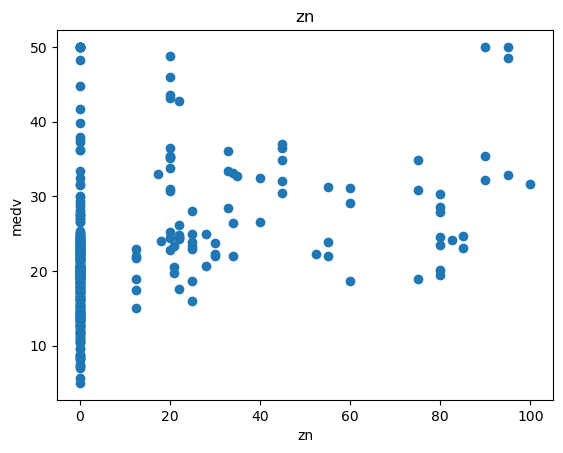

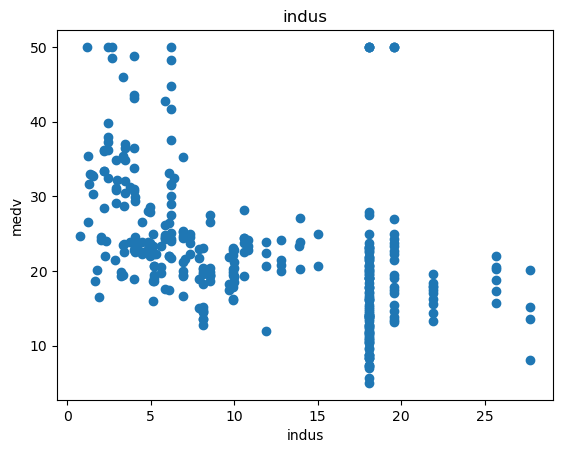

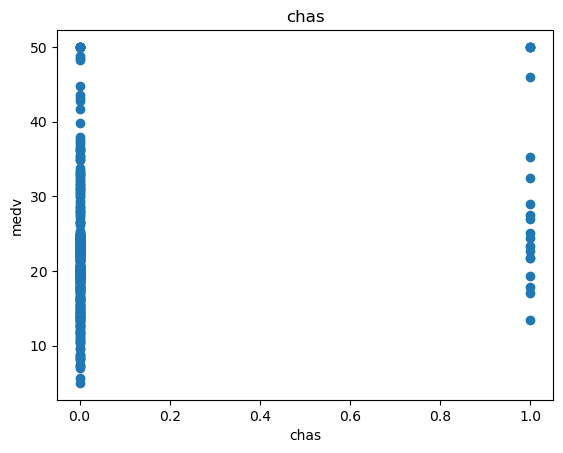

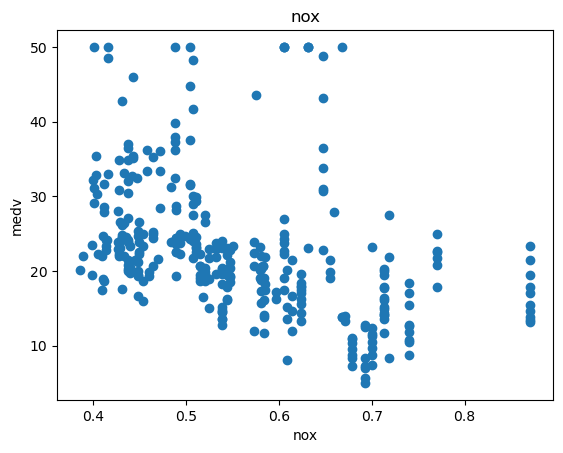

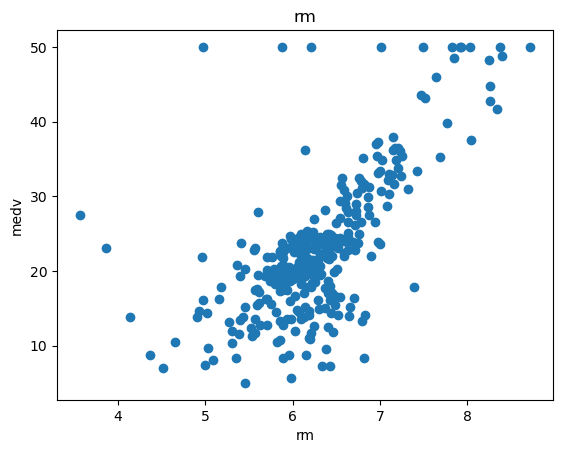

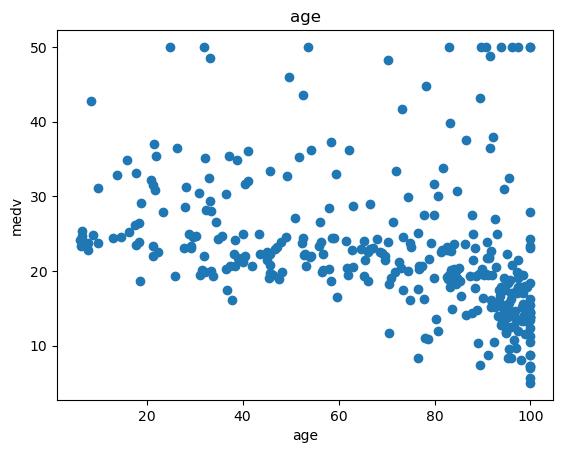

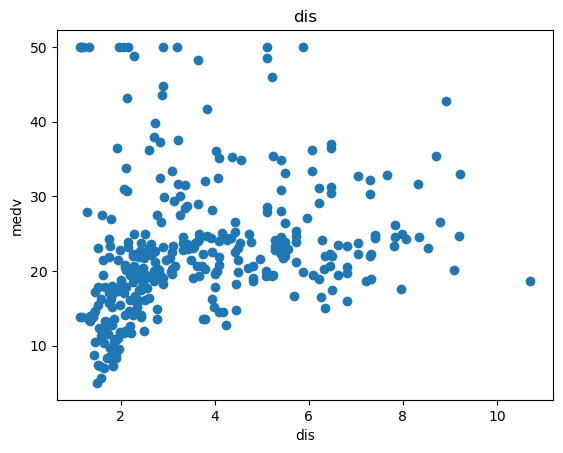

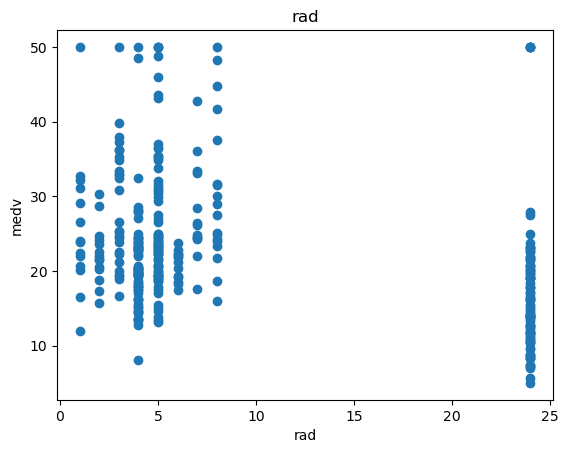

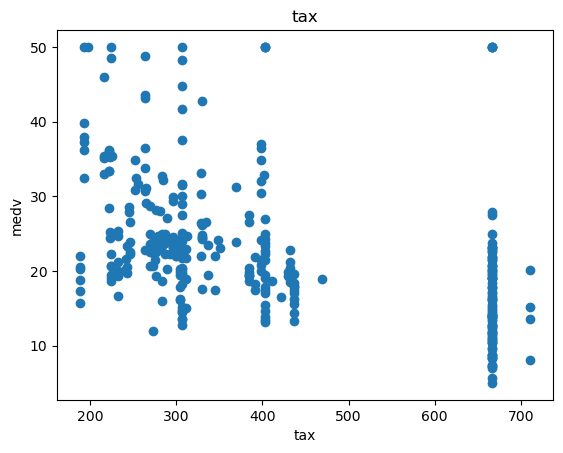

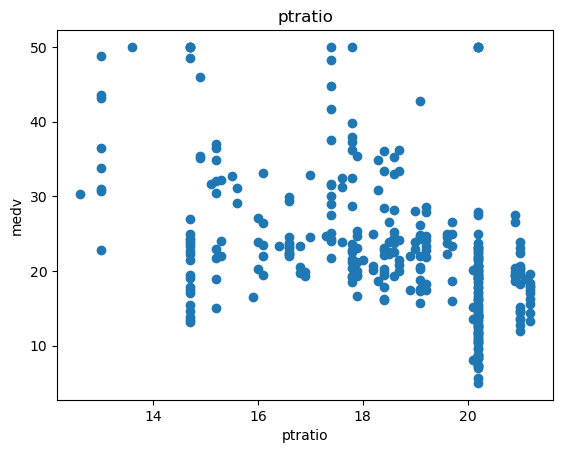

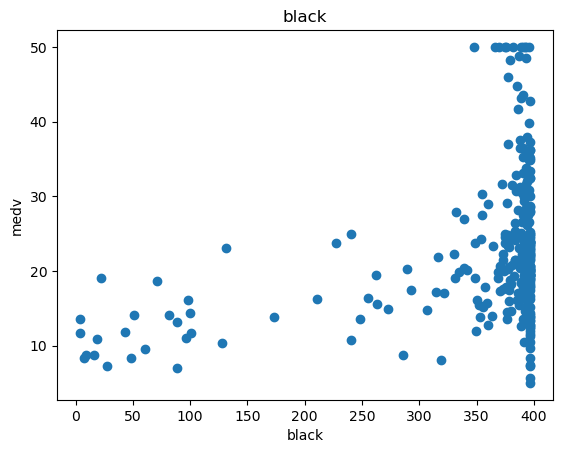

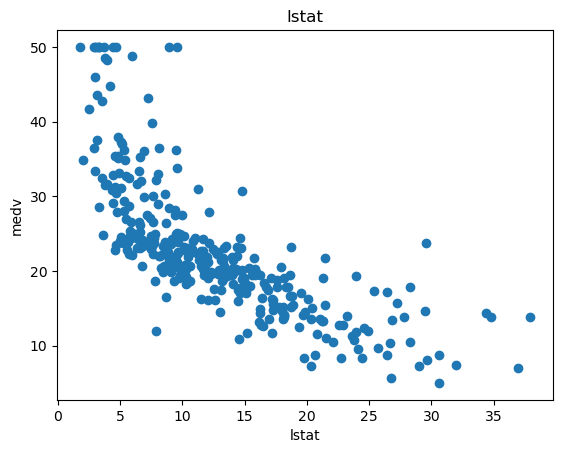

In [85]:
for label in train.columns[:-1]:
    plt.scatter(train[label], train["medv"])
    plt.title(label)
    plt.ylabel("medv")
    plt.xlabel(label)
    plt.show()

In [86]:
# Check correlations with the target variable
corr_matrix = train.corr()
target_corr = corr_matrix['medv'].sort_values(ascending=False)
print(target_corr)

medv       1.000000
rm         0.689598
zn         0.344842
black      0.336660
dis        0.249422
chas       0.204390
ID        -0.221694
rad       -0.352251
age       -0.358888
crim      -0.407454
nox       -0.413054
tax       -0.448078
indus     -0.473932
ptratio   -0.481376
lstat     -0.738600
Name: medv, dtype: float64


In [87]:
# Drop unnecessary columns in the training data
train = train.drop(["ID", "chas", "indus", "zn", "crim", "nox", "rad", "lstat", "black", "ptratio", "age", "tax", "dis"], axis=1)

# Separate features and target from training data
X = train.drop(columns=['medv'])  # Features
y = train['medv']  # Target

# Ensure the same columns are in the test data (excluding the columns not present in test data)
test = test.drop(["ID", "chas", "indus", "zn", "crim", "nox", "rad", "lstat", "black", "ptratio", "age", "tax", "dis"], axis=1)
X_test = test


In [95]:
train.head()

,rm,medv
0,6.575,24.0
1,6.421,21.6
2,6.998,33.4
3,7.147,36.2
4,6.012,22.9


# Train, Validate and Test data

In [89]:
#split the the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize the model
model =  LinearRegression()

#train the data
model.fit(X_train, y_train)

#predict on validation
y_val_pred = model.predict(X_val)

#evaluate the model
rmse = root_mean_squared_error(y_val, y_val_pred)

print(f'Validation RMSE: {rmse}')

Validation RMSE: 6.030059909809334


In [90]:
test_predictions = model.predict(X_test)


In [91]:
from sklearn.metrics import r2_score
r2_score(y_val, y_val_pred)

0.5959747117709422

In [92]:
# Create a submission DataFrame
submission = pd.DataFrame({
    'ID': test['ID'],
    'medv': test_predictions
})

# Ensure the order matches the submission_example.csv
submission = submission[sub.columns]

# Save the submission file
submission.to_csv('submission.csv', index=False)


KeyError: 'ID'